# EDA for Twitter texts

In [3]:
!git clone https://github.com/OmdenaAI/omdena-singapore-covid-health/tree/main/src

Cloning into 'src'...
fatal: repository 'https://github.com/OmdenaAI/omdena-singapore-covid-health/tree/main/src/' not found


In [11]:
#import cleaned twitter data from github
import pandas as pd

final_clean_data = pd.read_csv('final_clean_data.csv')
final_clean_data.tail()

,Unnamed: 0,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month
66645,105217,2021-01-28 07:44:00,[],russelwongphoto,0,0,0,frontline,stpi honours frontline healthcare social worke...,2021,1
66646,105218,2021-01-26 15:02:00,[],ShaheerBirdieFC,7,1,0,frontline,covid care speech drove us frontline warriors ...,2021,1
66647,105219,2021-01-23 12:41:00,[],rishabhm,0,0,0,frontline,know still early days india seems administerin...,2021,1
66648,105220,2021-01-16 15:50:00,[],Erongodath,0,0,0,frontline,pm gets emotional speaking invaluable contribu...,2021,1
66649,105222,2021-05-19 19:33:00,[],MissFortuneCat,0,0,0,school closure,like super necessary people share things like ...,2021,5


## Basic EDA- Comparing tweets throughout Covid-19 (across years) 

In [47]:
clean_2021= final_clean_data[final_clean_data.date.str.startswith('2021')]
clean_2020= final_clean_data[final_clean_data.date.str.startswith('2020')]
clean_2019 = final_clean_data[final_clean_data.date.str.startswith('2019')]

In [48]:
tweets_2021= " ".join(str(row) for row in clean_2021['clean_tweet4'])
tweets_2020= " ".join(str(row) for row in clean_2020['clean_tweet4'])
tweets_2019= " ".join(str(row) for row in clean_2019['clean_tweet4'])

all_tweets= {"text":[tweets_2021, tweets_2020, tweets_2019]}
all_tweets= pd.DataFrame(all_tweets, index= ["2021", "2020", "2019" ])
labels= ["2021", "2020", "2019"]
all_tweets["year"]= labels
all_tweets.head()

,text,year
2021,finally many people depression time umuntu fee...,2021
2020,one men thought thank much kept calling cute d...,2020
2019,best depression killer worshipping jesus try v...,2019


In [123]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') #You can remove stop words using CountVectorizer as well
data_cv = cv.fit_transform(all_tweets.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = all_tweets.index
data_dtm

data = data_dtm.transpose()
#transpose changes columns to rows and rows to columns
print(data)

                2021  2020  2019
aa                 6    11     0
aaa                2     6     1
aaaa               3     0     0
aaaaa              0     2     1
aaaaaa             2     1     0
...              ...   ...   ...
zzzzz              4     1     2
zzzzzz             1     1     1
zzzzzzzzz          0     0     2
zzzzzzzzzzz        1     0     1
zzzzzzzzzzzzzz     0     0     1

[66779 rows x 3 columns]


In [49]:
# Top 30 words by each category 
top_dict = {}
for c in data.columns: #for each review data type, we see which word is most frequently appeared in which review category 
    top = data[c].sort_values(ascending=False).head(5)
    top_dict[c]= list(zip(top.index, top.values))

# Counter makes it easy to count values in a list see more on https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter

# Let's first pull out the top 30 words for each category
words = []
for category in data.columns:
    top = [word for (word, count) in top_dict[category]]
    for t in top:
        words.append(t)

In [66]:
# If more than half of the categories (6) have it as a top word, exclude it from the list 
common = [word for word, count in Counter(words).most_common() if count > 1]
common

['help', 'tired', 'covid', 'singapore', 'like']

In [119]:
data.head()

,2021,2020,2019
aa,6,11,0
aaa,2,6,1
aaaa,3,0,0
aaaaa,0,2,1
aaaaaa,2,1,0


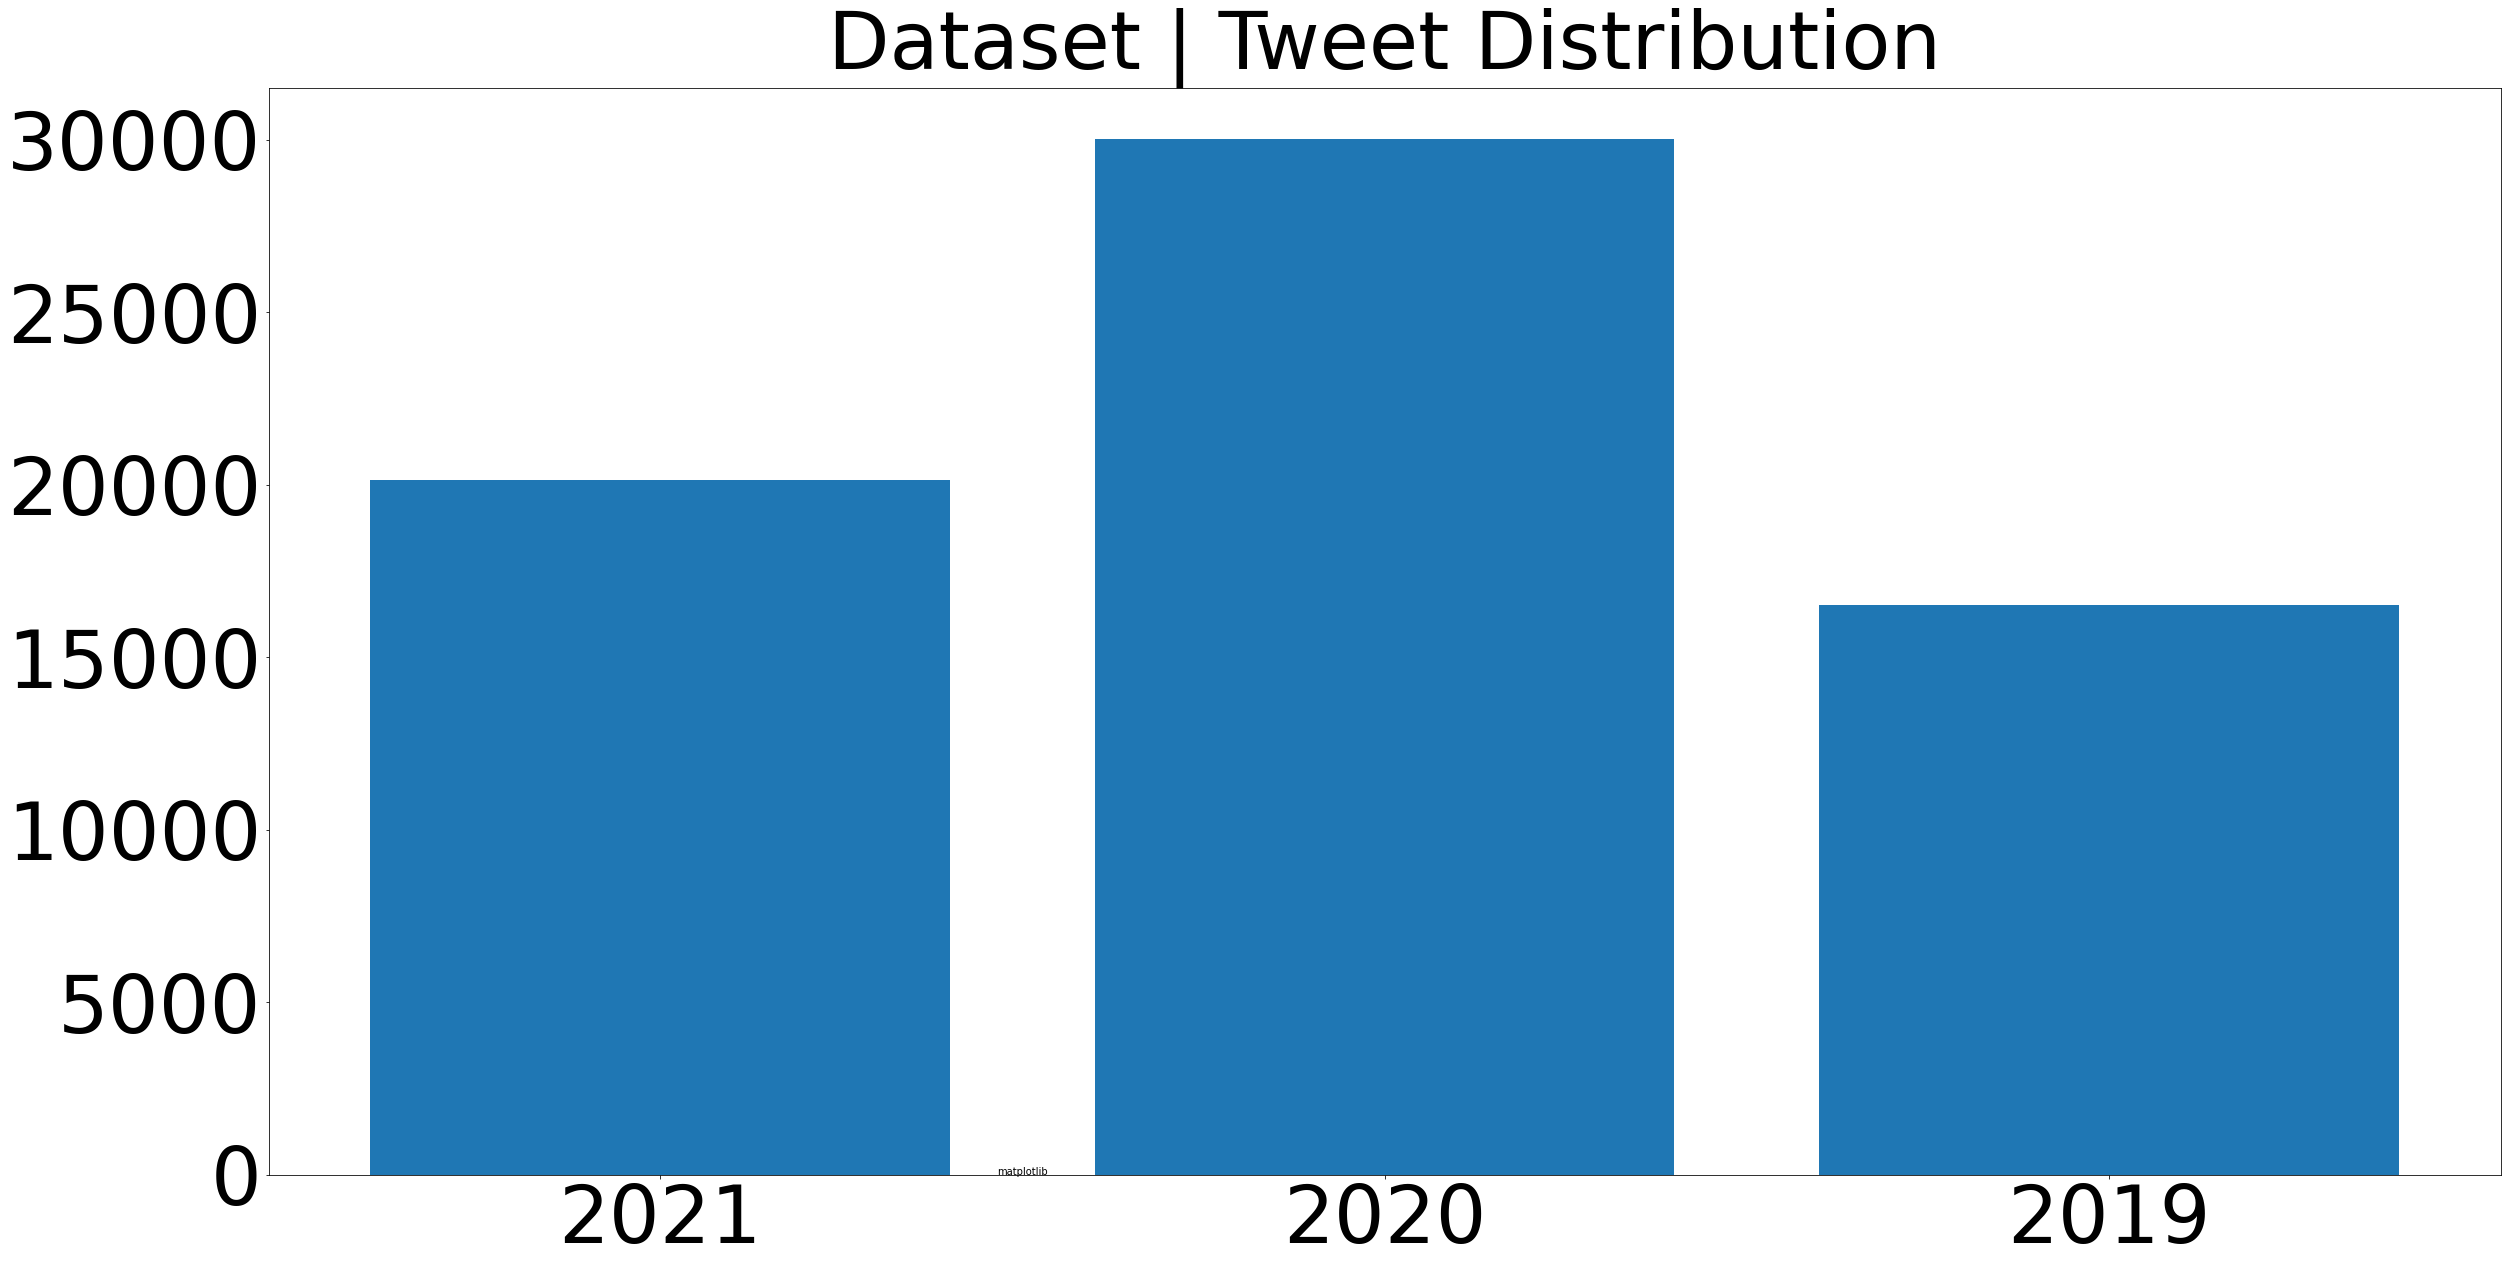

In [124]:
#understanding data

value_counts= [clean_2021.shape[0], clean_2020.shape[0], clean_2019.shape[0]]
plt.bar(data_dtm.index.astype('str'), value_counts)
plt.xticks(fontsize= 80)
plt.yticks(fontsize=80)
plt.text(0.5, 0.5, 'matplotlib', horizontalalignment='center')
plt.title("Dataset | Tweet Distribution", fontsize= 80)
plt.show()

## Drawing Word Clouds

In [16]:
!conda install --yes -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\teiwk\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         196 KB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_1

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_0




wordcloud-1.8.1      | 196 KB    |            |   0% 
wordcloud-1.8.1      | 196 KB    | 8          |   8% 
wordcloud-1.8.1     

In [14]:
#import required libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [34]:
tweets1= " ".join(str(row) for row in final_clean_data['clean_tweet4'])
tweets2= " ".join(str(row) for row in final_lemmatized_data['parse_tweet'])

### Consolidated Word Clouds

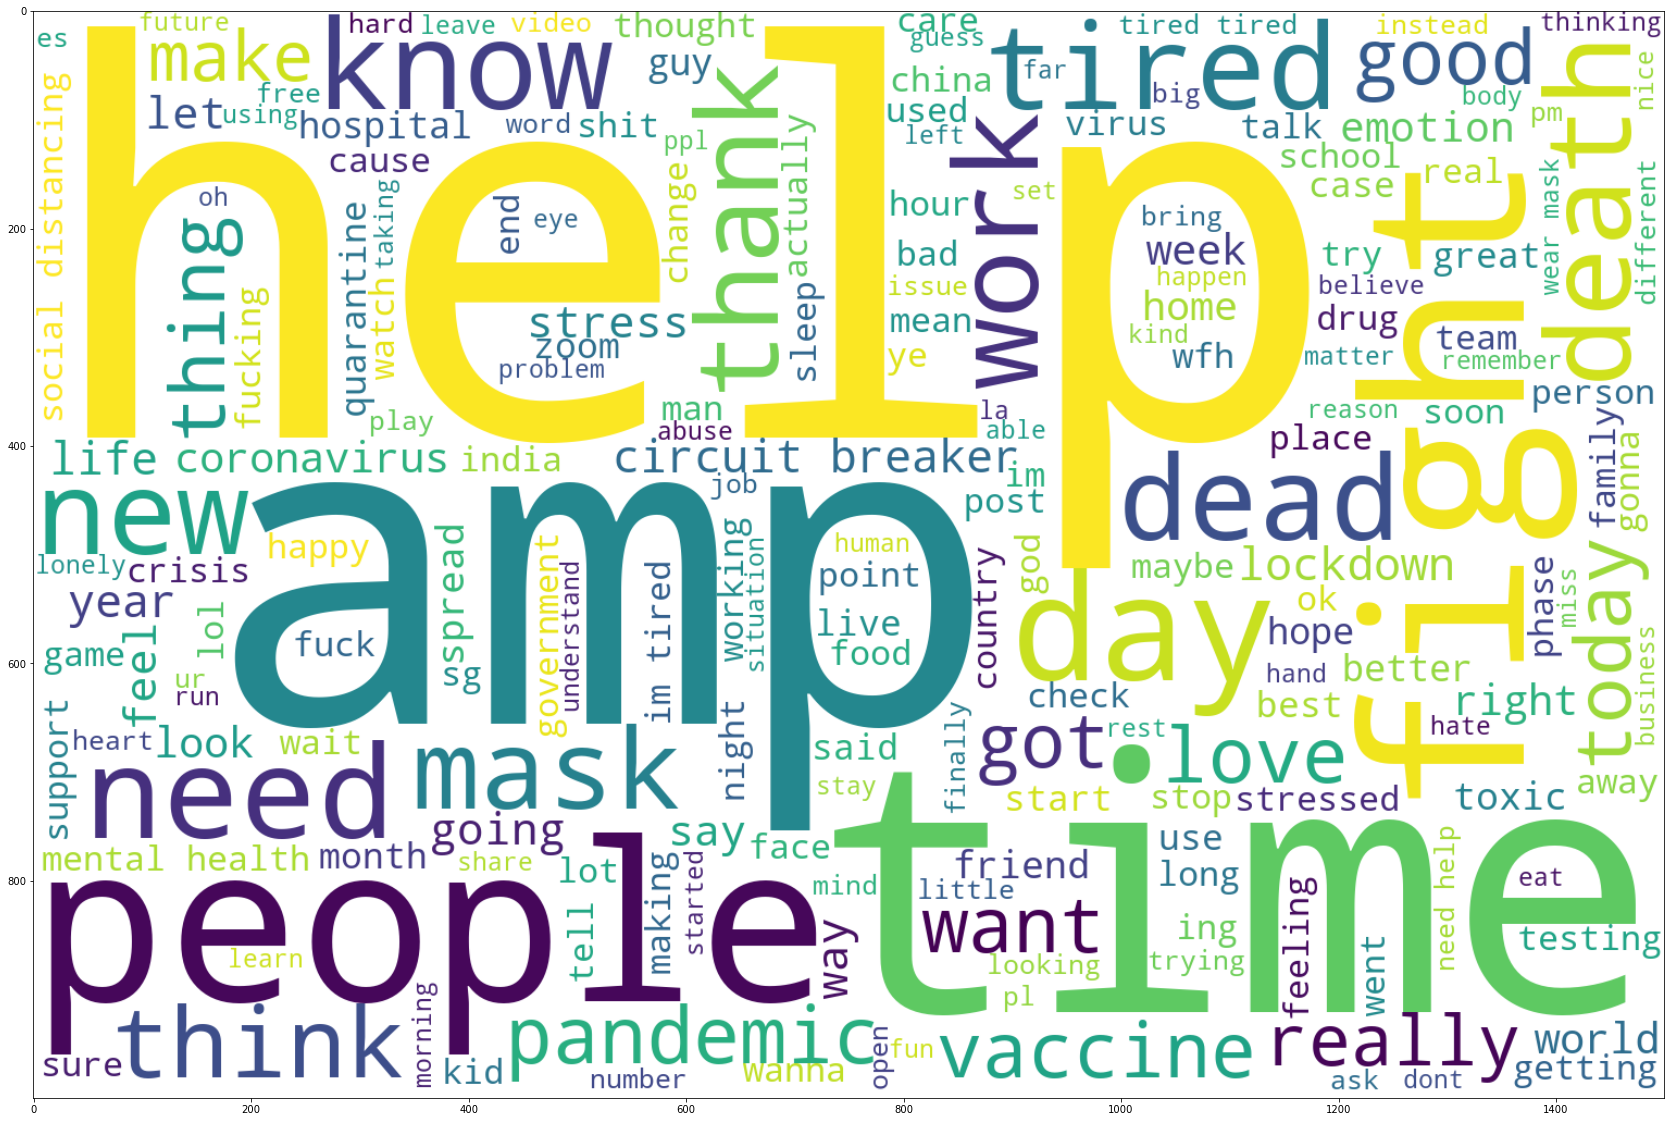

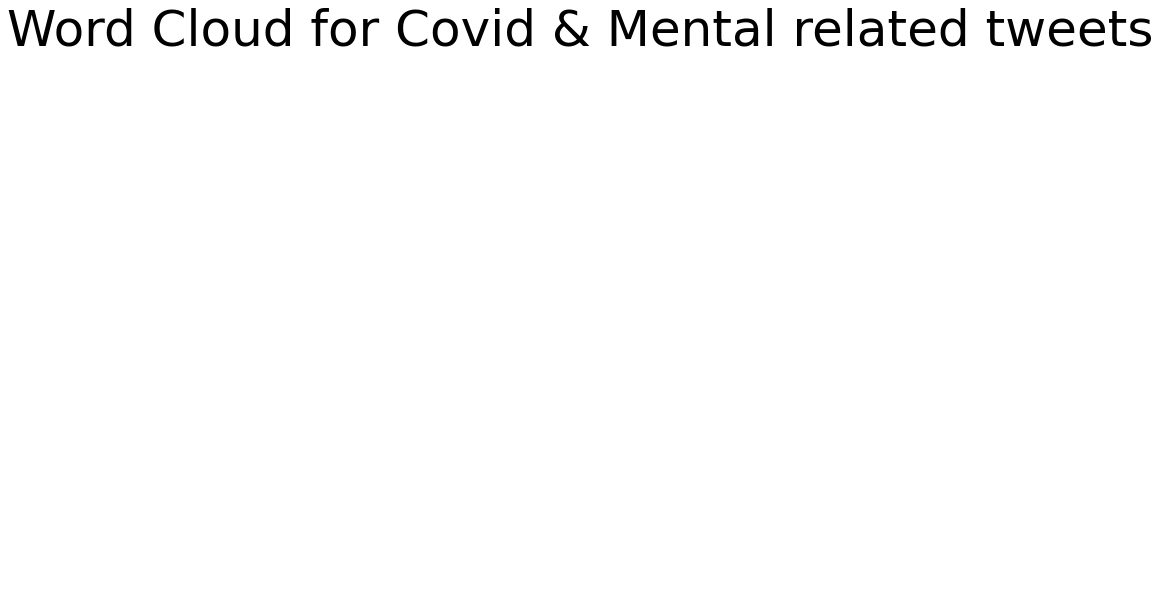

In [121]:
# Create and generate a word cloud image:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

#add new stop words
add_stop_words= ["singapore", "covid", "like"]
stop_words= text.ENGLISH_STOP_WORDS.union(add_stop_words)
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=1500, height=1000).generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure( figsize=(20,10) )
plt.title("Word Cloud for Covid & Mental related tweets", fontsize= 50)
plt.axis("off")
plt.show()
#wordcloud.to_file("enjoyable_comp.png")

### Word Clouds Across Time

In [71]:
wc = WordCloud(stopwords= stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

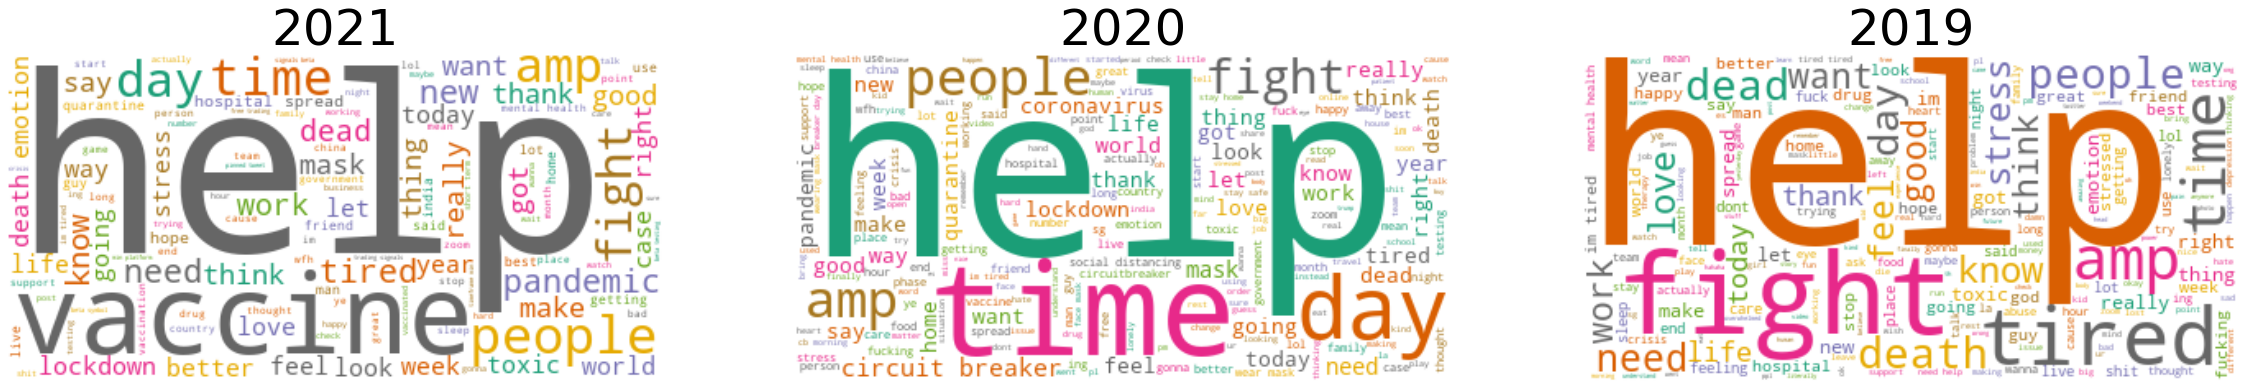

In [89]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [40, 20]

# Create subplots for each year
for index, category in enumerate(data.columns):
    wc.generate(all_tweets.text[category])
    plt.subplot(1, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(labels[index], fontsize= 50)
    
plt.show()